# Programming for Data Science and Artificial Intelligence

## 9.1 Deep Learning - Neural Network

### Readings

- [WEIDMAN] Ch1,2
- [CHARU] Ch1

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

## Foundations

To understand the essence of Neural Network, you are required to understand these components:

1. Functions
2. Derivatives
3. Nested Functions
4. The Chain Rule
    - Simple example
    - Longer example
    - Multiple inputs
    - Multiple vector inputs
    - 2D matrix inputs
    
To make sure we understand, we shall use 3 perspectives - (1) Math, (2) Diagrams, and (3) Code
   
### Functions

Here are two examples of functions, described in mathematical notation, where this notation is typically *non-standard*:

#### Mathematical representations

A function $f_1$ that takes one **input** $x$ and **output** $x^2$

$$f_1(x) = x^2$$

Here is another function $f_2$ that takes one **input** $x$ and **output** $max(x, 0)$

$$f_2(x) = max(x, 0)$$

#### Diagrams

Diagrams are another useful way to depict.  Not so useful for calculus, but useful when thniking about deep learning mdoels.

<img src = "../figures/functions.png" width=400>

#### Code

Of course, as our name of our class suggests, last way to think about functions are using the code format.  Throughout our exploration of Neural Network, we shall use Numpy as our tool to understand Neural Network, as well as enhance our skills in Numpy and Python in general.  The code of $f_1$ and $f_2$ are given below:

In [2]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)

def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input ndarray.
    '''
    return 1 / (1 + np.exp(-x))

Text(0, 0.5, 'output')

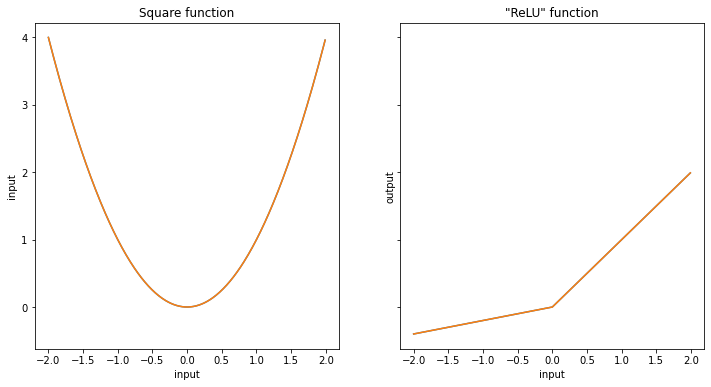

In [3]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('input')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')

### Derivatives

Derivative of a **function** at a **point** is the **rate of change** of the **output** of the function with respect to its **input** at that point. 

Rate of change is simply a ratio between change in one variable divided by change in another variable.

$$\text{rate of change} = \frac{\text{change in variable 1}}{\text{change in variable 2}}$$

If we tried all points, it become a derivative of the whole function.

#### Mathematical representations

How much the output of $f$ changes as we change its input at a particular value $a$ of the input, can be described as limit:

$$ \frac{df}{da} = 
\lim_{\Delta \to 0} \frac{{f \left( {a + \Delta } \right) - f\left(a - \Delta \right)}}{2 * \Delta } $$

This limit can be approximated numerically by setting a very small value for $\Delta$, such as 0.001, so we can compute the derivative as

$$ \frac{df}{da} = 
\lim_{\Delta \to 0} \frac{{f \left( {a + 0.001 } \right) - f\left(a - 0.001 \right)}}{0.002} $$

#### Diagrams

If we draw a tangent line to the function $f$, the derivative of $f$ at point $a$ is just the slope of this line at $a$.  One easy way to find the slope is to use Calculus.  Another way is to use limits.

<img src = "../figures/derivatives.png" width=400>

As an exercise, try find the derivative of a **square** function when $x = 2$.  Then attempt to verify using calculus.

<img src = "../figures/derivatives2.png" width=400>

Here is the calculations:

$$ \frac{df}{dx} = \frac{2.001^2 - 1.999^2}{0.002} = 4 $$

We can also get this number 4 using calculus

$$ \frac{df(x^2)}{dx} = 2x$$

Replace $x$ with 2, we get

$2(2) = 4$

**The key question of derivative is here, so what does 4 here means?**

This 4 means that **for every 0.001 increase when $x=2$, it will increase 4 $\times$ 0.001 in the output**.

We can easily verify this:

$$2.001^2 = 4.004$$

Thus, to rephrase our definition of derivative in the context of this example, derivative of the square function is the **rate of change** of the output $4$ in respect to its input $x = 2$.  

Here we found that the rate of change is $4$, which mean every 1 unit increase in $x = 2$ will increase 4 units on the output.   Similarly, this rate of change will change for other points.  For example, if $x = 3$, then the rate of change is $6$ (verify by yourself).   When we tried different x, and we get different corresponding rate of change, we are getting a **derivative function** which describe the derivatives at every point $x$

#### Code

Finally, we can code up the derivative function as below:

In [4]:
from typing import Callable

# Here, my Callable takes in an ndarray as an argument and produces an ndarray
def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

deriv(square, 2)

3.9999999999995595

### Nested Functions

Functions can be nested to form **composite** functions.  

#### Mathematical representations

If we have two functions, let's say $f_1$ and $f_2$, the output of one of the functions becomes the input to the next one, 

$$ f_2(f_1(x)) = y $$

This is a little bit counterintuitive but this reads first apply $f_1$ to $x$, then apply $f_2$ to the result of applying $f_1$ to $x$

#### Diagrams

The most natural way to represent a nested function is with the "minifactory" or "box" representations as follows:

<img src = "../figures/nested.png" width=400>

#### Code

First, we'll define a data typoe for nested functions and called it *Chain*

In [5]:
from typing import List

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]

Then we'll define how data goes through a chain, first of length 2

In [6]:
def chain_length_2(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))

Let's try some simple example that the code works

In [7]:
chain_1 = [square, sigmoid]
chain_length_2(chain_1, 2)

0.9820137900379085

### The Chain rule

The chain rule is a mathematical theorem that compute derivatives of composite functions.

#### Mathematical representations

Mathematically, the theorem states that, in the context of the above composite function, the derivatives of the composite function for a given value $x$ is

$$ \frac{df_2}{dx}(x) = \frac{df_2}{du}(f_1(x)) * \frac{df_1}{dx}(x) $$

where $u$ is simply a dummy variable representing the input to a function

#### Diagrams

The idea behind is that the derivative of the composite function should be a sort of product of the derivatives of its constituent functions.

![](../figures/chainrule2.png)

Let's say that we feed the value 5 into the first function, and let's say further that computing the derivative of the first function at $x = 5$ gives us a value of 3, i.e., $\frac{df_1(5)}{dx} = 3$.

Let's say that we then take the value of the function that comes out of the first box — let’s suppose it is 1, so that $f_1(5) = 1$ and compute the derivative of the second function $f_2$ at this value: we found that, $\frac{df_2(1)}{dx} = -2$. 

If we think about these functions as being literally strung together, then if changing the input to box two by 1 unit yields a change of –2 units in the output of box two, changing the input to box two by 3 units should change the output to box two by –2 × 3 = –6 units. This is why in the formula for the chain rule, the final result is ultimately a product: 

$$ \frac{df_2}{dx}(x) = \frac{df_2}{du}(f_1(x)) * \frac{df_1}{dx}(x) $$

#### Code

Let's code this up along with <code>sigmoid</code>.

In [8]:
def chain_deriv_2(chain: Chain,
                  x: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(x)

    # df1/dx
    df1dx = deriv(f1, x)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(x))

    # Multiplying these quantities together at each point
    return df1dx * df2du

In [9]:
chain = [square, sigmoid]

forward_pass = chain_length_2(chain, 2)
print("Forward: ", forward_pass)

backward_pass = chain_deriv_2(chain, 2)
print("Backward: ", backward_pass)


Forward:  0.9820137900379085
Backward:  0.0706508353807067


To verify, we can do a manual calculation:

In [10]:
delta_1 = chain_length_2(chain, 2 + 0.0001)
delta_2 = chain_length_2(chain, 2 - 0.0001)
manual_deriv = (delta_1 - delta_2)/ 0.0002

print("Forward: ", manual_deriv)

Forward:  0.07065082585744342


This manual_deriv means that if we increase the input to the composite function by 0.0001 unit, it will increase the output by <code>manual_deriv</code> * 0.001.  

Let's check whether that's true.

In [11]:
forward_pass_increase = chain_length_2(chain, 2 + 0.0001)
print("forward_pass_increase: ", forward_pass_increase)

rate_of_change = manual_deriv * 0.0001
forward_pass = chain_length_2(chain, 2)
print("forward manual: ", forward_pass + rate_of_change)

forward_pass_increase:  0.9820208539349344
forward manual:  0.9820208551204942


### Slightly Longer Example

Let's look at a slighly longer example including $f_1, f_2, f_3$

#### Mathematical representations

Mathematically, the result turns out to be the following expression:

$$ \frac{df_3}{dx}(x) = \frac{df_3}{du}(f_2(f_1(x))) * \frac{df_2}{du}(f_1(x)) * \frac{df_1}{dx}(x) $$


#### Diagrams

Here is the equivalent diagram:

<img src = "../figures/chain_3.png" width=400>

#### Code

Interestingly, already in this simple example, we see the beginnings of what will become the forward and backward passes of a neural network

In [12]:
def chain_length_3(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain".
    '''
    assert len(chain) == 3, \
    "Length of input 'chain' should be 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))

In [13]:
def chain_deriv_3(chain: Chain,
                  x: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(x)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # df3du
    df3du = deriv(f3, f2_of_x)

    # df2du
    df2du = deriv(f2, f1_of_x)

    # df1dx
    df1dx = deriv(f1, x)

    # Multiplying these quantities together at each point
    return df1dx * df2du * df3du

Let's verify this with $x = -4$

In [14]:
chain = [leaky_relu, square, sigmoid]

forward_pass = chain_length_3(chain, -4)
print("Forward: ", forward_pass)

backward_pass = chain_deriv_3(chain, -4)
print("Backward: ", backward_pass)

Forward:  0.6547534606063192
Backward:  -0.07233643296206184


Here, I will simply skip performing the manual_deriv and simply use backward_pass.  This backward_pass means that if we increase the input at point -4 to the composite function by 0.1 unit, it will increase the output by <code>backward_pass</code> * 0.1.  

Let's check whether that's true.

In [15]:
forward_pass_increase = chain_length_3(chain, -4 + 0.1)
print("forward_pass_increase: ", forward_pass_increase)

rate_of_change = backward_pass * 0.1
forward_pass = chain_length_3(chain, -4)
print("forward manual: ", forward_pass + rate_of_change)

forward_pass_increase:  0.6475757341144874
forward manual:  0.647519817310113


### Functions with Multiple Inputs

By this point, we have a conceptual understanding of how functions can be strung together to form composite functions. We also have a sense of how to represent these functions as series of boxes that inputs go into and outputs come out of. Finally, we’ve walked through how to compute the derivatives of these functions so that we understand these derivatives both mathematically and as quantities computed via a step-by-step process with a “forward” and “backward” component.

Oftentimes, the functions we deal with in deep learning don’t have just one input. Instead, they have several inputs that at certain steps are added together, multiplied, or otherwise combined. As we’ll see, computing the derivatives of the outputs of these functions with respect to their inputs is still no problem: let’s consider a very simple scenario with multiple inputs, where two inputs are added together and then fed through another function.

#### Mathematical representations

If our inputs are x and y, then we could think of the function as occurring in two steps. 

In Step 1, $x$ and $y$ are fed through a function that adds them together. We’ll denote that function as $\alpha$ (we’ll use Greek letters to refer to function names throughout) and the output of the function as $a$

$$ a = \alpha(x, y) = x + y $$

Step 2 would be to feed a through some function $\sigma$ ($\sigma$ can be any continuous function, such as sigmoid, or the square function, or even a function whose name doesn’t start with s). We’ll denote the output of this function as s:

$$ s = \sigma(a) $$

We could, equivalently, denote the entire function as $f$ and write:

$$ f(x, y) = \sigma(\alpha(x, y)) $$

Since we have two inputs, $x$ and $y$, we shall find the derivatives of the composite function in respect bo both $x$ and $y$.  Thus, we shall use partial derivatives.

$$ \frac{\partial f}{\partial x} = \frac{\partial \sigma}{\partial u}(\alpha(x, y)) * \frac{\partial \alpha}{\partial x}((x, y))$$

$$ \frac{\partial f}{\partial y} = \frac{\partial \sigma}{\partial u}(\alpha(x, y)) * \frac{\partial \alpha}{\partial y}((x, y))$$

Now note that:

$$\frac{\partial \alpha}{\partial x}((x, y)) = 1$$

$$\frac{\partial \alpha}{\partial y}((x, y)) = 1$$

since for every unit increase in $x$, a increases by one unit, no matter the value of x (the same holds for y).

#### Diagrams

Here is the equivalent diagram:

<img src = "../figures/multiple_inputs.png" width=400>

#### Code

This is simple as follows.  

Note: Whenever we deal with an operation that takes multiple ndarrays as inputs, we have to check their shapes to ensure they meet whatever conditions are required by that operation. Here, for a simple operation such as addition, all we need to check is that the shapes are identical so that the addition can happen elementwise.

In [16]:
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    '''
    Function with multiple inputs and addition, forward pass
    '''
    assert x.shape == y.shape

    a = x + y
    return sigma(a)

In [17]:
def multiple_inputs_add_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float:
    '''
    Computes the derivative of this simple function with respect to
    both inputs
    '''
    # Compute "forward pass"
    a = x + y

    # Compute derivatives
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady

Let's try to use it:

In [18]:
forward_pass = multiple_inputs_add(np.array(3), np.array(4), sigmoid)
print("forward pass: ", forward_pass)

backward_pass = multiple_inputs_add_backward(np.array(3), np.array(4), sigmoid)
print("backward pass: ", backward_pass)

forward pass:  0.9990889488055994
backward pass:  (0.0009102213310852036, 0.0009102213310852036)


Let's try to verify as usual, starting with $x$:

In [19]:
forward_pass_xincrease = multiple_inputs_add(np.array(3+0.001), np.array(4), sigmoid)
print("forward pass: ", forward_pass_xincrease)
print("forward pass: ", forward_pass + backward_pass[0] * 0.001)

forward pass:  0.9990898585726491
forward pass:  0.9990898590269305


In [20]:
forward_pass_yincrease = multiple_inputs_add(np.array(3), np.array(4+0.001), sigmoid)
print("forward pass: ", forward_pass_yincrease)
print("forward pass: ", forward_pass + backward_pass[1] * 0.001)

forward pass:  0.9990898585726491
forward pass:  0.9990898590269305


In [21]:
forward_pass_xyincrease = multiple_inputs_add(np.array(3+0.001), np.array(4+0.001), sigmoid)
print("forward pass: ", forward_pass_xyincrease)
print("forward pass: ", forward_pass + backward_pass[0] * 0.001 + backward_pass[1] * 0.001)

forward pass:  0.9990907674320407
forward pass:  0.9990907692482616


### Functions with multiple vector inputs

In deep learning, we deal with functions whose inputs are vectors or matrices. Not only can these objects be added, multiplied, and so on, but they can also combined via a dot product or a matrix multiplication. We shall show how the mathematics of the chain rule and the logic of computing the derivatives of these functions using a forward and backward pass can still apply.

These techniques will end up being central to understanding why deep learning works. In deep learning, our goal will be to fit a model to some data. More precisely, this means that we want to find a mathematical function that maps observations from the data — which will be inputs to the function—to some desired predictions from the data — which will be the outputs of the function—in as optimal a way as possible. It turns out these observations will be encoded in matrices, typically with row as an observation and each column as a numeric feature for that observation. 

#### Mathematical representations

We shall use this as our example:

$$S = f(X, W) = \sigma(\nu(X, W)) = \sigma(x_1 * w_1 + x_2 * w_2 + x_3 * w_3)$$

That is, we first feed in $\nu$ function which performs a dot product between $X$ and $W$.  Then we feed the output to a $\sigma$ function.

For details, let's first work on the $\nu$ part.  Assume a $X$ with only one sample and can be depicted as vector as follows:

$$X = [x_1, x_2, \cdots, x_n]$$

We shall also define weight as follows:

$$ W = \begin{bmatrix}
w_{1} \\
w_{2} \\
\vdots \\
w_{n} \\
\end{bmatrix} $$

Then we could define a function $\nu$ that calculates the weighted sum, which the output is denotes as $N$ as follows:

$$N = \nu(X, W) = X @ W = x_1 * w_1 + x_2 * w_2 + \cdots + x_n * w_n$$

The question is then what is $$\frac{\partial \nu}{\partial X}, \frac{\partial \nu}{\partial W}$$ 

How would we even define "the derivative with respect to a matrix"?  Recalling that the matrix syntas is just a shorthand for a bunch of numbers arranged in a particular form.  

Since $X$ is a row, and let's say we have three features, we can define

$$\frac{\partial \nu}{\partial X} = \big[\frac{\partial \nu}{\partial x_1} \ \frac{\partial \nu}{\partial x_2} \ \frac{\partial \nu}{\partial x_3}\big]$$

However, the output of $\nu$ is just a number: 

$$N = x_1 * w_1 + x_2 * w_2 + x_3 * w_3$$

And looking at this, we can see that if, for example, $x_1$ change by $k$ units, then $N$ will change by $w_1 \ \times \ k$ units - and the same logic applies to the other $x_i$ elements.  Thus

$$\frac{\partial \nu}{\partial x_1} = w_1$$

$$\frac{\partial \nu}{\partial x_2} = w_2$$

$$\frac{\partial \nu}{\partial x_3} = w_3$$

And so

$$\frac{\partial \nu}{\partial X} = \big[w_1 \ w_2 \ w_3\big] = W^\top$$

Using the similar reasoning, we can see that

$$\frac{\partial \nu}{\partial W} = \begin{bmatrix}
x_{1} \\
x_{2} \\
x_{3} \\
\end{bmatrix} = X^\top$$

Now, if we feed the output of $\nu$ to $\sigma$, and calculate the derivatives, we got:

$$\frac{\partial f}{\partial X} = \frac{\partial \sigma} {\partial u}(\nu(X, W) \ \times \ \frac{\partial \nu}{\partial X} (X, W)$$

The first part is:

$$\frac{\partial \sigma} {\partial u}(\nu(X, W) = \frac{\partial \sigma}{\partial u}(x_1 * w_1 + x_2 * w_2 + x_3 * w_3)$$

The second part is

$$\frac{\partial \nu}{\partial X} (X, W) = W^\top$$

Thus 

$$\frac{\partial f}{\partial X} = \frac{\partial \sigma}{\partial u}(x_1 * w_1 + x_2 * w_2 + x_3 * w_3) \ @ \ W^\top$$


#### Diagrams

Here is the equivalent diagram:

<img src = "../figures/vector_op3.png" width=400>

and the derivative diagram:

<img src = "../figures/vector_op4.png" width=400>

#### Code



In [22]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function) -> ndarray:
    '''
    Computes the forward pass of a function involving matrix multiplication, one extra function
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    return S

In [23]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of our matrix function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

In [24]:
np.random.seed(190203)

X = np.random.randn(1,3)
W = np.random.randn(3,1)

print("X: ", X)

forward_pass = matrix_forward_extra(X, W, sigmoid)
print("Forward: ", forward_pass)

backward_pass = matrix_function_backward_1(X, W, sigmoid)
print("Backward: ", backward_pass)

X:  [[ 0.47231121  0.61514271 -1.72622715]]
Forward:  [[0.89779986]]
Backward:  [[ 0.08516695 -0.05574581 -0.11206627]]


Let's verify as usual.  If $x_1$ is increase by $k$ unit, the output should increase by <code>backward[0][0]</code> * $k$ units.

In [25]:
X_new = X.copy()
X_new[:, 0] += 0.001
forward_pass_add1 = matrix_forward_extra(X_new, W, sigmoid)
print("forward pass: ", forward_pass_add1)
print("forward pass: ", forward_pass + backward_pass[0][0] * 0.001)

forward pass:  [[0.897885]]
forward pass:  [[0.89788503]]


### Functions with matrix multiplication

Now let's extend the previous section into matrix instead of vectors. 

#### Mathematical representations

Let's suppose that

$$ X = \begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33}
\end{bmatrix} $$

and

$$ W = \begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32} \\
\end{bmatrix} $$

This could correspond to a dataset in which each observation has three features, and the three rows could correspond to three different observations for which we want to make predictions.

We shall use the same function as the previous example where we first perform dot product and then feed into a sigma function.

As before, the question now is: what are the gradients of the output $S$ with respect to $X$ and $W$? Can we simply use the chain rule again? Why or why not?

If you think about this for a bit, you may realize that something is different from the previous examples that we’ve looked at: $S$ is now a matrix, not simply a number. And what, after all, does the gradient of one matrix with respect to another matrix mean?

This leads us to a subtle but important idea: we may perform whatever series of operations on multidimensional arrays we want, but for the notion of a "gradient" with respect to some output to be well defined, we need to sum (or otherwise aggregate into a single number) the final array in the sequence so that the notion of "how much will changing each element of $X$ affect the output" will even make sense.

So we’ll tack onto the end a third function, Lambda $\Lambda$, that simply takes the elements of $S$ and sums them up.

Let’s make this mathematically concrete. First, let’s multiply $X$ and $W$:

$$ \nu(X, W) = X @ W = \begin{bmatrix}
x_{11} * w_{11} + x_{12} * w_{21} + x_{13} * w_{31} &
x_{11} * w_{12} + x_{12} * w_{22} + x_{13} * w_{32}
\\
x_{21} * w_{11} + x_{22} * w_{21} + x_{23} * w_{31} &
x_{21} * w_{12} + x_{22} * w_{22} + x_{23} * w_{32}
\\
x_{31} * w_{11} + x_{32} * w_{21} + x_{33} * w_{31} &
x_{31} * w_{12} + x_{32} * w_{22} + x_{33} * w_{32}
\end{bmatrix} = 
\begin{bmatrix}
XW_{11} &
XW_{12}
\\
XW_{21} &
XW_{22}
\\
XW_{31} &
XW_{32}
\end{bmatrix}
$$

Here we denote row $i$ and column $j$ in the resulting matrix as $XW_{ij}$ for convenience.

Next, we’ll feed this result through $\sigma$, which just means applying $\sigma$ to every element of the matrix $X @ W$

$$ \sigma(X @ W) = \begin{bmatrix}
\sigma(x_{11} * w_{11} + x_{12} * w_{21} + x_{13} * w_{31}) &
\sigma(x_{11} * w_{12} + x_{12} * w_{22} + x_{13} * w_{32})
\\
\sigma(x_{21} * w_{11} + x_{22} * w_{21} + x_{23} * w_{31}) &
\sigma(x_{21} * w_{12} + x_{22} * w_{22} + x_{23} * w_{32})
\\
\sigma(x_{31} * w_{11} + x_{32} * w_{21} + x_{33} * w_{31}) &
\sigma(x_{31} * w_{12} + x_{32} * w_{22} + x_{33} * w_{32})
\end{bmatrix} = 
\begin{bmatrix}
\sigma(XW_{11}) & \sigma(XW_{12})\\
\sigma(XW_{21}) & \sigma(XW_{22})\\
\sigma(XW_{31}) & \sigma(XW_{32})
\end{bmatrix}
$$

Finally, we can simply sum up these elements:

$$ L = \Lambda(\sigma(X * W)) = \Lambda(\begin{bmatrix}
\sigma(XW_{11}) & \sigma(XW_{12})\\
\sigma(XW_{21}) & \sigma(XW_{22})\\
\sigma(XW_{31}) & \sigma(XW_{32})
\end{bmatrix}) =  \sigma(XW_{11}) + \sigma(XW_{12}) + \sigma(XW_{21}) + \sigma(XW_{22}) + \sigma(XW_{31}) + \sigma(XW_{32})
$$

Now we are back in a pure calculus setting: we have a number, $L$, and we want to figure out the gradient of $L$ with respect to $X$ and $W$; that is, we want to know how much changing each element of these input matrices ($x11$, $w21$, and so on) would change $L$. We can write this as:

$$ \frac{\partial \Lambda}{\partial u}(X) = 
\begin{bmatrix}
\frac{\partial \Lambda}{\partial u}(x_{11}) & 
\frac{\partial \Lambda}{\partial u}(x_{12}) & 
\frac{\partial \Lambda}{\partial u}(x_{13}) \\
\frac{\partial \Lambda}{\partial u}(x_{21}) & 
\frac{\partial \Lambda}{\partial u}(x_{22}) & 
\frac{\partial \Lambda}{\partial u}(x_{23}) \\
\frac{\partial \Lambda}{\partial u}(x_{31}) & 
\frac{\partial \Lambda}{\partial u}(x_{32}) & 
\frac{\partial \Lambda}{\partial u}(x_{33}) 
\end{bmatrix} $$

This could be then solved by the following chain rule problem as follows: 

$$ \frac{\partial \Lambda}{\partial u}(X) = 
\frac{\partial \nu}{\partial X}(X, W) *
\frac{\partial \sigma}{\partial u}(N) *
\frac{\partial \Lambda}{\partial u}(S) $$

Last term is the easiest.  We want to know how much $L$ will increase if each element of $S$ increases.  Since $L$ is the sum of all the element of $S$, this derivative is simply:

$$ \frac{\partial \Lambda}{\partial u}(S) = \begin{bmatrix}
1 & 1\\
1 & 1\\
1 & 1
\end{bmatrix} $$

since increasing any element of $S$ by, say, 0.46 units would increase $\Lambda$ by 0.46 units.

Second term $\frac{\partial \sigma}{\partial u}(N)$ is also easy.  It is simply the partial derivative of $\sigma$ at that point.  Since we didn't exactly define what is $\sigma$, we shall leave it as like this:

$$ \frac{\partial \sigma}{\partial u}(N) = \begin{bmatrix}
\frac{\partial \sigma}{\partial u}(XW_{11}) &
\frac{\partial \sigma}{\partial u}(XW_{12}) \\
\frac{\partial \sigma}{\partial u}(XW_{21}) &
\frac{\partial \sigma}{\partial u}(XW_{22}) \\
\frac{\partial \sigma}{\partial u}(XW_{31}) &
\frac{\partial \sigma}{\partial u}(XW_{32})
\end{bmatrix} $$

Now, we can already find the product of second and last term which is:

$$ \frac{\partial \Lambda}{\partial u}(N) = 
\frac{\partial \Lambda}{\partial u}(S) *
\frac{\partial \sigma}{\partial u}(N) =  \begin{bmatrix}
\frac{\partial \sigma}{\partial u}(XW_{11}) &
\frac{\partial \sigma}{\partial u}(XW_{12}) \\
\frac{\partial \sigma}{\partial u}(XW_{21}) &
\frac{\partial \sigma}{\partial u}(XW_{22}) \\
\frac{\partial \sigma}{\partial u}(XW_{31}) &
\frac{\partial \sigma}{\partial u}(XW_{32})
\end{bmatrix} $$

How about $$\frac{\partial \nu}{\partial X}(X, W)$$ and $$\frac{\partial \nu}{\partial W}(X, W)$$

This is asking how much increasing each element of $X$ will increase each element of $N$.  Same for $W$ on $N$. This is actually difficult to think about since it is about asking how much increasing each element of $X$ (a $3 \ \times \ 3$ matrix) will increase each element of $N$ (a $3 \ \times \ 2$ matrix). 

Remember that L is literally:

$$\sigma(XW_{11}) + \sigma(XW_{12}) + \sigma(XW_{21}) + \sigma(XW_{22}) + \sigma(XW_{31}) + \sigma(XW_{32})$$

where this is shorthand for the fact that:

$$\sigma(XW_{11}) = \sigma(x_{11} * w_{11} + x_{12} * w_{21} + x_{13} * w_{31})$$

$$\sigma(XW_{12}) = \sigma(x_{11} * w_{12} + x_{12} * w_{22} + x_{13} * w_{32})$$

Let's just zoom in on one expression.  What would it look like if we took the partial derivatives of say $\sigma(XW_{11})$ with respect to every element of $X$ (which is utimately what we'll want to do with all six components of $L$)?

Well, since:

$$\sigma(XW_{11}) = \sigma(x_{11} * w_{11} + x_{12} * w_{21} + x_{13} * w_{31})$$

It isn't too hard to see that the partial derivatives of this with respect to $x_1$, via a very simple applications of the chain rule is:

$$\frac{\partial \sigma(XW_{11})}{\partial x_1} = \frac{\partial \sigma}{\partial u}(XW_{11}) \ \times \ w_{11}$$

Since the only thing that $x_{11}$ is multiplied by in the $XW_{11}$ expression is $w_{11}$, the partial derivative with respect to everything else is 0.

Thus, using similar reasoning, we get

$$\frac{\partial \sigma(XW_{11})}{\partial X} = \begin{bmatrix}
\frac{\partial \sigma}{\partial u}(XW_{11}) * w_{11} & 
\frac{\partial \sigma}{\partial u}(XW_{11}) * w_{21} & 
\frac{\partial \sigma}{\partial u}(XW_{11}) * w_{31} \\
0 &
0 & 
0 \\
0 & 
0 & 
0 
\end{bmatrix}$$

Similarly, we can also get for other part like this:

$$\sigma(XW_{32}) = \sigma(x_{31} * w_{12} + x_{32} * w_{22} + x_{33} * w_{32})$$

$$\frac{\partial \sigma(XW_{32})}{\partial X} = \begin{bmatrix}
0 & 
0 & 
0 \\
0 &
0 & 
0 \\
\frac{\partial \sigma}{\partial u}(XW_{32}) * w_{12} & 
\frac{\partial \sigma}{\partial u}(XW_{32}) * w_{22} & 
\frac{\partial \sigma}{\partial u}(XW_{32}) * w_{32} 
\end{bmatrix}$$

We shall omit other parts for brevity.

Now we have all the components to actually compute $\frac{\partial \Lambda}{\partial X}(S)$
directly. We can simply compute six matrices of the same form as the preceding matrices and add the results together.

First, we'll actually write out explicitly that $\frac{\partial \Lambda}{\partial X}(S)$ is a sum of six matrices as follows:

$$ \frac{\partial \Lambda}{\partial X}(S) = 
\frac{\partial \sigma(XW_{11})}{\partial X} + 
\frac{\partial \sigma(XW_{12})}{\partial X} + 
\frac{\partial \sigma(XW_{21})}{\partial X} + 
\frac{\partial \sigma(XW_{22})}{\partial X} + 
\frac{\partial \sigma(XW_{31})}{\partial X} + 
\frac{\partial \sigma(XW_{32})}{\partial X} = 
\begin{bmatrix}
\frac{\partial \sigma}{\partial u}(XW_{11}) * w_{11} & 
\frac{\partial \sigma}{\partial u}(XW_{11}) * w_{21} & 
\frac{\partial \sigma}{\partial u}(XW_{11}) * w_{31} \\
0 &
0 & 
0 \\
0 & 
0 & 
0 \end{bmatrix} +
\begin{bmatrix}
\frac{\partial \sigma}{\partial u}(XW_{12}) * w_{12} & 
\frac{\partial \sigma}{\partial u}(XW_{12}) * w_{22} & 
\frac{\partial \sigma}{\partial u}(XW_{12}) * w_{32} \\
0 &
0 & 
0 \\
0 & 
0 & 
0 \end{bmatrix} + 
\begin{bmatrix}
0 & 
0 & 
0 \\
\frac{\partial \sigma}{\partial u}(XW_{21}) * w_{11} &
\frac{\partial \sigma}{\partial u}(XW_{21}) * w_{21} & 
\frac{\partial \sigma}{\partial u}(XW_{21}) * w_{31} \\
0 & 
0 & 
0 \end{bmatrix} + 
\begin{bmatrix}
0 & 
0 & 
0 \\
\frac{\partial \sigma}{\partial u}(XW_{22}) * w_{12} &
\frac{\partial \sigma}{\partial u}(XW_{22}) * w_{22} & 
\frac{\partial \sigma}{\partial u}(XW_{22}) * w_{32} \\
0 & 
0 & 
0 \end{bmatrix} +
\begin{bmatrix}
0 & 
0 &
0 \\
0 &
0 & 
0 \\
\frac{\partial \sigma}{\partial u}(XW_{31}) * w_{11} &
\frac{\partial \sigma}{\partial u}(XW_{31}) * w_{21} & 
\frac{\partial \sigma}{\partial u}(XW_{31}) * w_{31} \end{bmatrix} +
\begin{bmatrix}
0 &
0 &
0 \\
0 &
0 & 
0 \\
\frac{\partial \sigma}{\partial u}(XW_{32}) * w_{12} & 
\frac{\partial \sigma}{\partial u}(XW_{32}) * w_{22} & 
\frac{\partial \sigma}{\partial u}(XW_{32}) * w_{32} \end{bmatrix}
$$

Combining that yields:

$$ \frac{\partial \Lambda}{\partial X}(S) = 
\begin{bmatrix}
\frac{\partial \sigma}{\partial u}(XW_{11}) * w_{11} + \frac{\partial \sigma}{\partial u}(XW_{12}) * w_{12} & 
\frac{\partial \sigma}{\partial u}(XW_{11}) * w_{21} + \frac{\partial \sigma}{\partial u}(XW_{12}) * w_{22} & 
\frac{\partial \sigma}{\partial u}(XW_{11}) * w_{31} + \frac{\partial \sigma}{\partial u}(XW_{12}) * w_{32} \\ 
\frac{\partial \sigma}{\partial u}(XW_{21}) * w_{11} + \frac{\partial \sigma}{\partial u}(XW_{22}) * w_{12} & 
\frac{\partial \sigma}{\partial u}(XW_{21}) * w_{21} + \frac{\partial \sigma}{\partial u}(XW_{22}) * w_{22} & 
\frac{\partial \sigma}{\partial u}(XW_{21}) * w_{31} + \frac{\partial \sigma}{\partial u}(XW_{22}) * w_{32} \\ 
\frac{\partial \sigma}{\partial u}(XW_{31}) * w_{11} + \frac{\partial \sigma}{\partial u}(XW_{32}) * w_{12} & 
\frac{\partial \sigma}{\partial u}(XW_{31}) * w_{21} + \frac{\partial \sigma}{\partial u}(XW_{32}) * w_{22} & 
\frac{\partial \sigma}{\partial u}(XW_{31}) * w_{31} + \frac{\partial \sigma}{\partial u}(XW_{32}) * w_{32} \end{bmatrix} 
$$

Now comes the most amazing part!  Recall that:

$$ W = \begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32} \end{bmatrix} $$

Well, $W$ is hidden in the preceding matrix — it is just transposed. 

Recalling that:

$$ \frac{\partial \Lambda}{\partial u}(N) = 
\frac{\partial \Lambda}{\partial u}(S) *
\frac{\partial \sigma}{\partial u}(N) =  \begin{bmatrix}
\frac{\partial \sigma}{\partial u}(XW_{11}) &
\frac{\partial \sigma}{\partial u}(XW_{12}) \\
\frac{\partial \sigma}{\partial u}(XW_{21}) &
\frac{\partial \sigma}{\partial u}(XW_{22}) \\
\frac{\partial \sigma}{\partial u}(XW_{31}) &
\frac{\partial \sigma}{\partial u}(XW_{32})
\end{bmatrix} $$

It turns out that the previous matrix is equivalent to:

$$ \frac{\partial \Lambda}{\partial X}(X) = 
\begin{bmatrix}
\frac{\partial \sigma}{\partial u}(XW_{11}) &
\frac{\partial \sigma}{\partial u}(XW_{12}) \\
\frac{\partial \sigma}{\partial u}(XW_{21}) &
\frac{\partial \sigma}{\partial u}(XW_{22}) \\
\frac{\partial \sigma}{\partial u}(XW_{31}) &
\frac{\partial \sigma}{\partial u}(XW_{32})
\end{bmatrix} * 
\begin{bmatrix}
w_{11} & w_{21} & w_{31} \\
w_{12} & w_{22} & w_{32} \\
\end{bmatrix} = \frac{\partial \Lambda}{\partial u}(S) *
\frac{\partial \sigma}{\partial u}(N) \ @ \ W^T
$$

Thus, 

$$ \frac{\partial \Lambda}{\partial u}(X) = 
\frac{\partial \Lambda}{\partial u}(S) * 
\frac{\partial \sigma}{\partial u}(N) \ @ \
W^T
$$

So nice, right!?

Note: The expression for the gradient of $L$ with respect to $W$ would be $X^\top$. However, because of the order in which the $X^\top$ expression factors out of the derivative for $L$, $X^\top$ would be on the left side of the expression for the gradient of $L$ with respect to $W$:

$$ 
\frac{\partial \Lambda}{\partial u}(W) = X^T \ @ \
\frac{\partial \Lambda}{\partial u}(S) * 
\frac{\partial \sigma}{\partial u}(N)$$

In code, therefore, while we would have <code>dNdW = np.transpose(X, (1, 0))</code>, the next step would be: <code>dLdW = np.dot(dNdW, dSdN)</code>
instead of dLdX = np.dot(dSdN, dNdX) as before.

#### Diagrams

We are simply sending inputs forward as before. We claim that even in this more complicated scenario, we should be able to calculate the gradients we need using the chain rule.

<img src = "../figures/neuralnet1.png" width=400>

We simply need to calculate the partial derivative of each constituent function and evaluate it at its input, multiplying the results together to get the final derivative. 

<img src = "../figures/neuralnet1_1.png" width=400>

#### Code

In [26]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [27]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    '''
    Compute derivative of matrix function with a sum with respect to the
    first matrix input
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    # note: I'll refer to the derivatives by their quantities here,
    # unlike the math where we referred to their function names

    # dLdS - just 1s
    dLdS = np.ones_like(S)

    # dSdN
    dSdN = deriv(sigma, N)
    
    # dLdN
    dLdN = dLdS * dSdN

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # dLdX
    dLdX = np.dot(dSdN, dNdX)

    return dLdX

Let's test our code

In [28]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X:")
print(X)

print("L:")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print()
print("dLdX:")
print(matrix_function_backward_sum_1(X, W , sigmoid))

X:
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]
L:
2.3755

dLdX:
[[ 0.2488887  -0.37478057  0.01121962]
 [ 0.12604152 -0.27807404 -0.13945837]
 [ 0.22992798 -0.36623443 -0.02252592]]


In [29]:
X1 = X.copy()
X1[0, 0] += 0.001

print(round(
        (matrix_function_forward_sum(X1, W, sigmoid) - \
         matrix_function_forward_sum(X, W, sigmoid)) / 0.001, 4))

0.2489


## Linear Regression as Neural Network

In the last section, we have learned roughly the basic components of neural network.  Let's put them further and implement linear regression as neural network.  Linear regression is a good example since it is something we already understand and would be perfect example to see that neural network in the most basic form, is actually linear regression!

Given the following neural network for linear regression:

![](../figures/linearneuralnet.png)

Code can be simply written as follows:

In [30]:
from typing import Callable, Dict, Tuple, List

def forward(X: ndarray, y: ndarray,
            weights: Dict[str, ndarray]
           )-> Tuple[float, Dict[str, ndarray]]:
    '''
    Forward pass for the step-by-step linear regression.
    '''
    # assert batch sizes of X and y are equal
    assert X.shape[0] == y.shape[0]

    # assert that matrix multiplication can work
    assert X.shape[1] == weights['W'].shape[0]

    # assert that B is simply a 1x1 ndarray
    assert weights['B'].shape[0] == weights['B'].shape[1] == 1

    # compute the operations on the forward pass
    N = X @ weights['W']

    P = N + weights['B']

    loss = np.mean(np.power(y - P, 2))

    # save the information computed on the forward pass
    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

#### Calculating gradients

The next step is to train the model using gradient descent.  To calculate the gradient, we simply apply chain rule and multiply their products together.  The main derivatives we need is $\frac{\partial \Lambda}{\partial W}$ and $\frac{\partial \Lambda}{\partial B}$  where 

$$ \frac{\partial \Lambda}{\partial W} = 
    \frac{\partial \Lambda}{\partial P}(P, Y) *
    \frac{\partial \alpha}{\partial N}(N, B) *
    \frac{\partial \nu}{\partial W}(X, W)
$$

and 

$$ \frac{\partial \Lambda}{\partial B} = 
    \frac{\partial \Lambda}{\partial P}(P, Y) *
    \frac{\partial \alpha}{\partial B}(N, B)
$$

Since $$ \Lambda(P, Y) = (Y - P)^2 $$, thus

$$ \frac{\partial \Lambda}{\partial P}(P, Y) = 
-1 * (2 * (Y - P)^2)
$$

Next, for $$ \frac{\partial \alpha}{\partial N}(N, B) $$

Since $\alpha$ is simply addition, increasing any element of N by one unit will increase N + B by one unit, thus $$ \frac{\partial \alpha}{\partial N}(N, B) $$ is simply a list of ones with shape of N like:

<code>dPdN = np.ones_like(N) </code>

Similarly, $$ \frac{\partial \alpha}{\partial B}(N, B) $$ is simply a list of ones with shape of B like:

<code>dPdB = np.ones_like(B) </code>

Last, we have $$ \frac{\partial \nu}{\partial W}(X, W) $$  This is easy as we know already that 

$$ \frac{\partial \nu}{\partial W}(X, W) = X^T $$ 

Thus

$$ \frac{\partial \nu}{\partial W}(X, W) $$

Last, there is small caveat is that we sum the expressions we compute for dLdB along axis = 0.  This is because $b$ is added to each row of the matrix, thus if b changes, it will affect all rows.  Thus the gradient in respect to b shall be summed along all the rows. This is why we sum the expressions for dLdB along axis=0.

Now, without further do....let's code right now!

In [31]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:

    dLdP = -2 * (forward_info['y'] - forward_info['P'])

    dPdN = np.ones_like(forward_info['N'])

    dPdB = np.ones_like(weights['B'])

    dLdN = dLdP * dPdN

    dNdW = forward_info['X'].T
    
    # need to use matrix multiplication here,
    # with dNdW on the left    
    dLdW = dNdW @ dLdN

    # need to sum along dimension since b is added to every row   
    dLdB = (dLdP * dPdB).sum(axis=0)

    loss_gradients: Dict[str, ndarrayy] = {}
    loss_gradients['W'] = dLdW
    loss_gradients['B'] = dLdB

    return loss_gradients

#### Putting everything together into a train method

To combine the loss_gradients and forward into a single train method, as well as some shuffling, we can do as follows:

In [32]:
def init_weights(n_in: int) -> Dict[str, ndarray]:
    '''
    Initialize weights on first forward pass of model.
    '''
    
    weights: Dict[str, ndarray] = {}
    W = np.random.randn(n_in, 1)
    B = np.random.randn(1, 1)
    
    weights['W'] = W
    weights['B'] = B

    return weights

In [33]:
def train(X: ndarray, 
          y: ndarray, 
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          return_losses: bool = False, 
          return_weights: bool = False) -> None:
    
    np.random.seed(42)
    start = 0

    #initialize randomom weights
    weights = init_weights(X.shape[1])

    # Permute data
    perm = np.random.permutation(X.shape[0])
    X, y = X[perm], y[perm]
    
    if return_losses:
        losses = []

    for i in range(n_iter):

        # in case all data is used
        if start >= X.shape[0]:
            perm = np.random.permutation(X.shape[0])
            X, y = X[perm], y[perm]
            start = 0
        
        #reduce batch size if exceeds
        if start+batch_size > X.shape[0]:
            batch_size = X.shape[0] - start
    
        X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]
        start += batch_size
    
        # Train net using generated batch
        forward_info, loss = forward(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        
        #loss_grads and weights have same keys
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights
    
    return None

#### Let's test our model

In [34]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
X = boston.data
y = boston.target
features = boston.feature_names
s = StandardScaler()
X = s.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#since our train function assumes y to be shape of (n, 1)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [35]:
train_info = train(X_train, y_train,
                   n_iter = 10000,
                   learning_rate = 0.001,
                   batch_size=23, 
                   return_losses=True, 
                   return_weights=True)
losses = train_info[0]
weights = train_info[1]

In [36]:
def predict(X: ndarray,
            weights: Dict[str, ndarray]):
    
    N = X @ weights['W']

    return N + weights['B']

In [37]:
y_pred = predict(X_test, weights)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("$R^2$: ", r2_score(y_test, y_pred))

MSE:  21.962219458334552
$R^2$:  0.7052569177141323


Let's plot the actual vs. predicted values

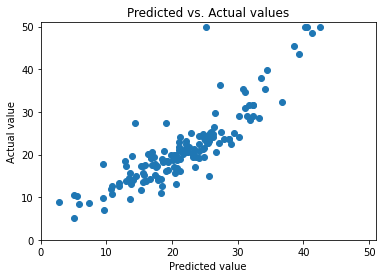

In [38]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(y_pred, y_test)

#### Importance of each feature

As we already know, since we standardize our features in the beginning, we can check the size of coefficients to know which one is important

In [39]:
weights['W']

#so which one is the most important feature?

array([[-1.21213267],
       [ 0.81433624],
       [ 0.30894756],
       [ 0.84788429],
       [-1.78763297],
       [ 2.87254465],
       [-0.2811529 ],
       [-2.9113813 ],
       [ 2.12380982],
       [-1.34482524],
       [-1.90944831],
       [ 1.14951932],
       [-4.008822  ]])

#### Compare with sklearn

To make sure our code from scratch is correct, let's compare with sklearn

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("$R^2$: ", r2_score(y_test, y_pred))

MSE:  21.517444231177276
$R^2$:  0.7112260057484923


## Improved model: Neural Network

As we see from above, the score is not really nice.  One possibility is due to the linear assumption of linear regression.  We may be able to improve the accuracy if we can deploy a non-linear model.  Here we shall modify linear regression to non-linear form in the neural network.  Here we shall further clearly see that adding non-linearity is basically adding more activation functions!   In fact, you will be surprised that neural network, at its most basic form, is actually a linear regression!

#### Step 1: Adding many linear regressions

In one linear regression. if our X had dimensions <code>[batch_size, num_features]</code>, then we multiplied it by a weight matrix W with dimensions <code>[num_features, 1]</code> to get an output of dimension <code>[batch_size, 1]</code>; this output is, for each observation in the batch, simply a weighted sum of the original features. 

To do multiple linear regressions, we’ll simply multiply our input by a weight matrix with dimensions <code>[num_features, num_outputs]</code>, resulting in an output of dimensions <code>[batch_size, num_outputs]</code>; now, for each observation, we have multiple (num_outputs) different weighted sums of the original features.

#### Step 2: A non-linear function

Next, we’ll feed each of these weighted sums through a nonlinear function; the first function we’ll try is the sigmoid function

Why is using this nonlinear function a good idea? Why not the square function f(x) = $x^2$, for example? There are a couple of reasons. First, we want the function we use here to be monotonic so that it “preserves” information about the numbers that were fed in. Let’s say that, given the date that was fed in, two of our linear regressions produced values of –3 and 3, respectively. Feeding these through the square function would then produce a value of 9 for each, so that any function that receives these numbers as inputs after they were fed through the square function would “lose” the information that one of them was originally –3 and the other was 3.

The second reason, of course, is that the function is nonlinear; this nonlinearity will enable our neural network to model the inherently nonlinear relationship between the features and the target.

Finally, the sigmoid function has the nice property that its derivative can be expressed in terms of the function itself:

$$ \frac{\partial \sigma}{\partial u}(x) = \sigma(x) * (1 - \sigma(x)) $$

#### Step 3: Add another linear regression

Finally, we’ll take the resulting 13 elements—each of which is a combination of the original features, fed through the sigmoid function so that they all have values between 0 and 1—and feed them into a regular linear regression, using them the same way we used our original features previously.

Then, we’ll try training the entire resulting function in the same way we trained the standard linear regression earlier in this chapter: we’ll feed data through the model, use the chain rule to figure out how much increasing the weights would increase (or decrease) the loss, and then update the weights in the direction that decreases the loss at each iteration. Over time (we hope) we’ll end up with a more accurate model than before, one that has “learned” the inherent nonlinearity of the relationship between our features and our target.”


Finally, consider the following network:

![](../figures/neuralnet2.png)

Let's code them accordingly:

Starting with the sigmoid function:

In [41]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-1.0 * x))

#### Let's start coding

In [42]:
#since our weights will depend on the size of nonlinearity,
#we can num_outputs as hidden_size
def init_weights(input_size: int, 
                 hidden_size: int) -> Dict[str, ndarray]:
    weights: Dict[str, ndarray] = {}
    weights['W1'] = np.random.randn(input_size, hidden_size)
    weights['B1'] = np.random.randn(1, hidden_size)
    weights['W2'] = np.random.randn(hidden_size, 1)
    weights['B2'] = np.random.randn(1, 1)
    return weights

In [43]:
#similar as before
def forward(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]
                 ) -> Tuple[Dict[str, ndarray], float]:

    M1 = X @ weights['W1']

    N1 = M1 + weights['B1']

    O1 = sigmoid(N1)
    
    M2 = O1 @ weights['W2']

    P = M2 + weights['B2']    

    loss = np.mean(np.power(y - P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['M1'] = M1
    forward_info['N1'] = N1
    forward_info['O1'] = O1
    forward_info['M2'] = M2
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

For the gradients, that we are interested to find is dLdW2, dLdB2, dLdW1, dLdB1 by performing the chain rule.  This can get messy but things are simply the same as above.  Also, a clean derivative of the sigmoid function is also very nice.

In [44]:
def loss_gradients(forward_info: Dict[str, ndarray], 
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
 
    #remove constant does not change the direction
    dLdP = -(forward_info['y'] - forward_info['P'])
    
    dPdM2 = np.ones_like(forward_info['M2'])
    
    dPdB2 = np.ones_like(weights['B2'])

    dLdM2 = dLdP * dPdM2
  
    dLdB2 = (dLdP * dPdB2).sum(axis=0)
    
    dM2dW2 = forward_info['O1'].T
    
    dM2dO1 = weights['W2'].T
    
    dLdW2 = dM2dW2 @ dLdP

    dLdO1 = dLdM2 @ dM2dO1
    
    dO1dN1 = sigmoid(forward_info['N1']) * (1- sigmoid(forward_info['N1']))
    
    dLdN1 = dLdO1 * dO1dN1
    
    dN1dB1 = np.ones_like(weights['B1'])
    
    dN1dM1 = np.ones_like(forward_info['M1'])
    
    dLdB1 = (dLdN1 * dN1dB1).sum(axis=0)
    
    dLdM1 = dLdN1 * dN1dM1
    
    dM1dW1 = forward_info['X'].T 

    dLdW1 = dM1dW1 @ dLdM1

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W2'] = dLdW2
    loss_gradients['B2'] = dLdB2.sum(axis=0)
    loss_gradients['W1'] = dLdW1
    loss_gradients['B1'] = dLdB1.sum(axis=0)
    
    return loss_gradients

Our train method looks very unchanged...except adding the hidden size parameter

In [45]:
def train(X: ndarray, 
          y: ndarray, 
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          return_losses: bool = False, 
          return_weights: bool = False,
          hidden_size = 13) -> None:
    
    np.random.seed(42)
    start = 0

    #initialize randomom weights
    weights = init_weights(X_train.shape[1], hidden_size = hidden_size)

    # Permute data
    perm = np.random.permutation(X.shape[0])
    X, y = X[perm], y[perm]
    
    if return_losses:
        losses = []

    for i in range(n_iter):

        # in case all data is used
        if start >= X.shape[0]:
            perm = np.random.permutation(X.shape[0])
            X, y = X[perm], y[perm]
            start = 0
        
        #reduce batch size if exceeds
        if start+batch_size > X.shape[0]:
            batch_size = X.shape[0] - start
    
        X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]
        start += batch_size
    
        # Train net using generated batch
        forward_info, loss = forward(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        
        #loss_grads and weights have same keys
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights
    
    return None

Since our network change, we also need to revise our predict method slightly:

In [46]:
def predict(X: ndarray, 
            weights: Dict[str, ndarray]) -> ndarray:

    M1 = np.dot(X, weights['W1'])

    N1 = M1 + weights['B1']

    O1 = sigmoid(N1)

    M2 = np.dot(O1, weights['W2'])

    P = M2 + weights['B2']    

    return P

Let's train model

In [47]:
train_info = train(X_train, y_train,
                   n_iter = 10000,
                   learning_rate = 0.001,
                   batch_size=23, 
                   return_losses=True, 
                   return_weights=True)
losses = train_info[0]
weights = train_info[1]

Here is the prediction accuracy:

In [48]:
y_pred = predict(X_test, weights)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("$R^2$: ", r2_score(y_test, y_pred))

MSE:  10.839123211769357
$R^2$:  0.8545339831990069


## Conclusion

We can learn several things here:
1. Non-linearity in the sigmoid function helps improve the performance
2. The math behind neural network, in fact, is much simpler than some traditional models!  It relies only the chain rule to derive the gradients of L in respect to W and B
3. Neural network, on its simplest form, is simply a linear regression.  In simple word, neural work can be seen as simply linear combinations of X.  But if we introduce sigmoid or other functions, it become non-linear
4. Key thing I want to focus is not on the programing side.  In fact, coding from scratch is mainly for the purpose of understanding neural network from ground up.  It is my intention that once you understand them, you can build on of your own in your research in the future.  Who knows some genius could be hiding here!